## Load dataset

In [13]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt


train_separable = pd.read_csv('../../input/A2-ring/A2-ring-separable.txt', sep="\t", header=None)
train_merged = pd.read_csv('../../input/A2-ring/A2-ring-merged.txt', sep="\t", header=None)
test = pd.read_csv('../../input/A2-ring/A2-ring-test.txt', sep="\t", header=None)
columns = ['Feature1', 'Feature2', 'Class']
train_separable.columns, train_merged.columns, test.columns = columns, columns, columns

X_train_sep = train_separable.iloc[:, :-1]
y_train_sep = train_separable.iloc[:, -1]
X_train_mrg = train_merged.iloc[:, :-1]
y_train_mrg = train_merged.iloc[:, -1]
X_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]



## Cross-validation

In [14]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

# parameters kernel and C options for cross-validation
kernel_options = ['linear', 'rbf']
C_options = [0.1, 1, 10]

# function for cross-validation
def perform_cross_validation(X, y, kernel_options, C_options):
    best_model = None
    best_accuracy = 0
    best_params = {}
    kf = KFold(n_splits=4)

    for kernel in kernel_options:
        for C in C_options:
            cv_accuracy = []

            for train, validation in kf.split(X):
                clf = SVC(kernel=kernel, C=C, random_state=0, probability=True)
                clf.fit(X.iloc[train], y.iloc[train].values.ravel())
                y_pred = clf.predict(X.iloc[validation])
                accuracy = accuracy_score(y.iloc[validation], y_pred)
                cv_accuracy.append(accuracy)

            mean_accuracy = np.mean(cv_accuracy)
            print(f"Kernel: {kernel}, C: {C}, Mean CV Accuracy: {mean_accuracy}")

            if mean_accuracy > best_accuracy:
                best_accuracy = mean_accuracy
                best_model = clf
                best_params = {'kernel': kernel, 'C': C}

    print(f"Best Model Parameters: {best_params}, Best Accuracy: {best_accuracy}")
    return best_model

print("Cross-validation for Separable Dataset:")
best_model_sep = perform_cross_validation(X_train_sep, y_train_sep, kernel_options, C_options)

print("\nCross-validation for Merged Dataset:")
best_model_mrg = perform_cross_validation(X_train_mrg, y_train_mrg, kernel_options, C_options)


Cross-validation for Separable Dataset:
Kernel: linear, C: 0.1, Mean CV Accuracy: 0.5203
Kernel: linear, C: 1, Mean CV Accuracy: 0.5203
Kernel: linear, C: 10, Mean CV Accuracy: 0.5203
Kernel: rbf, C: 0.1, Mean CV Accuracy: 0.962
Kernel: rbf, C: 1, Mean CV Accuracy: 0.9715
Kernel: rbf, C: 10, Mean CV Accuracy: 0.9929999999999999
Best Model Parameters: {'kernel': 'rbf', 'C': 10}, Best Accuracy: 0.9929999999999999

Cross-validation for Merged Dataset:
Kernel: linear, C: 0.1, Mean CV Accuracy: 0.5515000000000001
Kernel: linear, C: 1, Mean CV Accuracy: 0.5515000000000001
Kernel: linear, C: 10, Mean CV Accuracy: 0.5515000000000001
Kernel: rbf, C: 0.1, Mean CV Accuracy: 0.7695
Kernel: rbf, C: 1, Mean CV Accuracy: 0.7713
Kernel: rbf, C: 10, Mean CV Accuracy: 0.7807000000000001
Best Model Parameters: {'kernel': 'rbf', 'C': 10}, Best Accuracy: 0.7807000000000001


## Model Training for Separable Dataset

In [15]:
# train the model on the entire separable training set
best_model_sep.fit(X_train_sep, y_train_sep.values.ravel())

# predict on the separable training set
y_pred_train_sep = best_model_sep.predict(X_train_sep)

# confusion matrix for the separable training set
cm_train_sep = confusion_matrix(y_train_sep, y_pred_train_sep)

# elements of the confusion matrix
n00_train_sep = cm_train_sep[0][0]  # True Negatives
n01_train_sep = cm_train_sep[0][1]  # False Positives
n10_train_sep = cm_train_sep[1][0]  # False Negatives
n11_train_sep = cm_train_sep[1][1]  # True Positives

# classification error calculation for the separable training set
classification_error_percentage_train_sep = 100 * (n01_train_sep + n10_train_sep) / (n00_train_sep + n11_train_sep + n01_train_sep + n10_train_sep)
print(f"Separable Dataset - Percentage Classification Error on Training Set: {classification_error_percentage_train_sep}%")


Separable Dataset - Percentage Classification Error on Training Set: 0.42%


## Model Training for Merged Dataset

In [16]:
# train the model on the entire merged training set
best_model_mrg.fit(X_train_mrg, y_train_mrg.values.ravel())

# predict on the merged training set
y_pred_train_mrg = best_model_mrg.predict(X_train_mrg)

# confusion matrix for the merged training set
cm_train_mrg = confusion_matrix(y_train_mrg, y_pred_train_mrg)

# elements of the confusion matrix
n00_train_mrg = cm_train_mrg[0][0]  # True Negatives
n01_train_mrg = cm_train_mrg[0][1]  # False Positives
n10_train_mrg = cm_train_mrg[1][0]  # False Negatives
n11_train_mrg = cm_train_mrg[1][1]  # True Positives

# classification error calculation for the merged training set
classification_error_percentage_train_mrg = 100 * (n01_train_mrg + n10_train_mrg) / (n00_train_mrg + n11_train_mrg + n01_train_mrg + n10_train_mrg)
print(f"Merged Dataset - Percentage Classification Error on Training Set: {classification_error_percentage_train_mrg}%")


Merged Dataset - Percentage Classification Error on Training Set: 21.7%


## Test Dataset for Separable Dataset

In [17]:
# retrain the model on the entire separable training set
best_model_sep.fit(X_train_sep, y_train_sep.values.ravel())

# predict on the test set
y_pred_test_sep = best_model_sep.predict(X_test)

# calculate test accuracy for separable dataset
test_accuracy_sep = accuracy_score(y_test, y_pred_test_sep)
print(f"Accuracy on Test Set (Separable): {test_accuracy_sep}")

# display the confusion matrix for separable dataset
cm_sep = confusion_matrix(y_test, y_pred_test_sep)
print(f"Confusion Matrix (Separable):\n{cm_sep}")

# classification error calculation for the test set
n00_sep = cm_sep[0][0]
n01_sep = cm_sep[0][1]
n10_sep = cm_sep[1][0]
n11_sep = cm_sep[1][1]
classification_error_percentage_sep = 100 * (n01_sep + n10_sep) / (n00_sep + n11_sep + n01_sep + n10_sep)
print(f"Percentage Classification Error on Test Set (Separable): {classification_error_percentage_sep}%")


Accuracy on Test Set (Separable): 0.9948
Confusion Matrix (Separable):
[[5290   43]
 [   9 4658]]
Percentage Classification Error on Test Set (Separable): 0.52%


## Test Dataset for Merged Dataset

In [18]:
# retrain the model on the entire merged training set
best_model_mrg.fit(X_train_mrg, y_train_mrg.values.ravel())

# predict on the test set
y_pred_test_mrg = best_model_mrg.predict(X_test)

# calculate test accuracy for merged dataset
test_accuracy_mrg = accuracy_score(y_test, y_pred_test_mrg)
print(f"Accuracy on Test Set (Merged): {test_accuracy_mrg}")

# display the confusion matrix for merged dataset
cm_mrg = confusion_matrix(y_test, y_pred_test_mrg)
print(f"Confusion Matrix (Merged):\n{cm_mrg}")

# classification error calculation for the test set
n00_mrg = cm_mrg[0][0]
n01_mrg = cm_mrg[0][1]
n10_mrg = cm_mrg[1][0]
n11_mrg = cm_mrg[1][1]
classification_error_percentage_mrg = 100 * (n01_mrg + n10_mrg) / (n00_mrg + n11_mrg + n01_mrg + n10_mrg)
print(f"Percentage Classification Error on Test Set (Merged): {classification_error_percentage_mrg}%")


Accuracy on Test Set (Merged): 0.9788
Confusion Matrix (Merged):
[[5308   25]
 [ 187 4480]]
Percentage Classification Error on Test Set (Merged): 2.12%


## ROC Curve and AUC for Separable Dataset


AUC Score for Separable Dataset: 1.00%


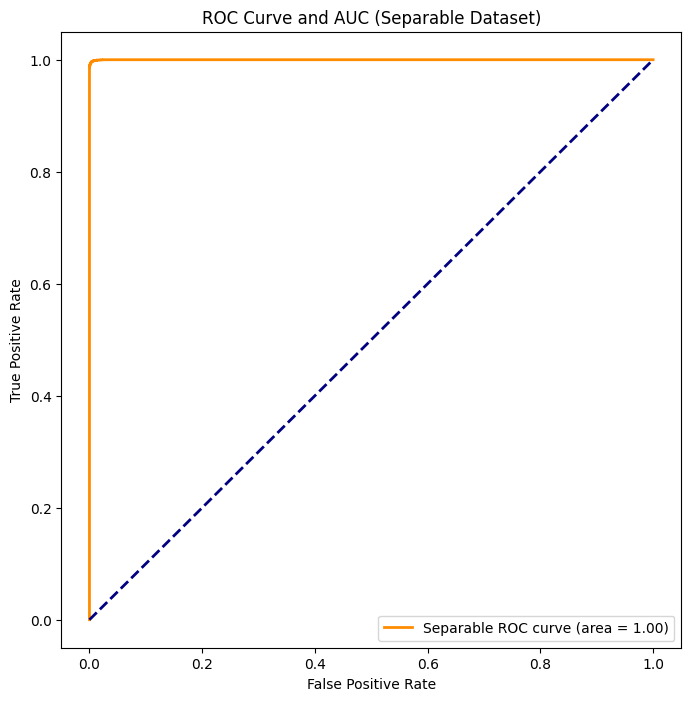

In [19]:
# ensure the model is trained
best_model_sep.fit(X_train_sep, y_train_sep.values.ravel())

# predict probabilities on the test set for the separable dataset
y_prob_sep = best_model_sep.predict_proba(X_test)[:, 1]
fpr_sep, tpr_sep, _ = roc_curve(y_test, y_prob_sep)
roc_auc_sep = auc(fpr_sep, tpr_sep)
print(f"AUC Score for Separable Dataset: {roc_auc_sep:.2f}%") 


# plot ROC curve for separable dataset
plt.figure(figsize=(8, 8))
plt.plot(fpr_sep, tpr_sep, color='darkorange', lw=2, label=f'Separable ROC curve (area = {roc_auc_sep:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve and AUC (Separable Dataset)')
plt.legend(loc="lower right")
plt.show()


## ROC Curve and AUC for Merged Dataset


AUC Score for Merged Dataset: 1.00%


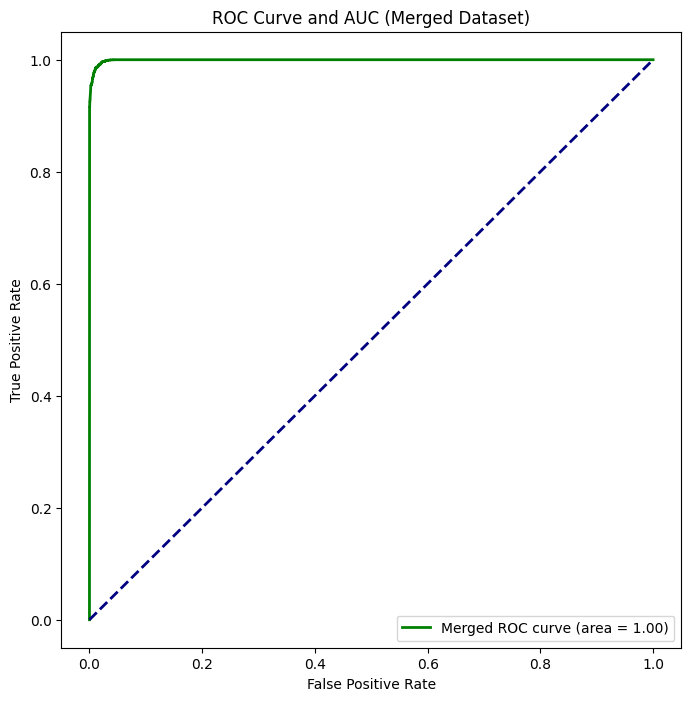

In [20]:
# ensure the model is trained
best_model_mrg.fit(X_train_mrg, y_train_mrg.values.ravel())

# predict probabilities on the test set for the merged dataset
y_prob_mrg = best_model_mrg.predict_proba(X_test)[:, 1]
fpr_mrg, tpr_mrg, _ = roc_curve(y_test, y_prob_mrg)
roc_auc_mrg = auc(fpr_mrg, tpr_mrg)
print(f"AUC Score for Merged Dataset: {roc_auc_mrg:.2f}%") 


# plot ROC curve for merged dataset
plt.figure(figsize=(8, 8))
plt.plot(fpr_mrg, tpr_mrg, color='green', lw=2, label=f'Merged ROC curve (area = {roc_auc_mrg:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve and AUC (Merged Dataset)')
plt.legend(loc="lower right")
plt.show()
